In [1]:
# Import package yang dibutuhkan untuk memprediksi

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

In [2]:
sns.set()
plt.style.use('fivethirtyeight')

data = pd.read_csv("C:\\Users\\Anteraja\\Downloads\\Data Historis TLKM.csv")
data.head()

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%
0,15/07/2022,4.15,4.04,4.21,4.01,"146,09M","3,23%"
1,14/07/2022,4.02,3.94,4.02,3.90,"68,71M","2,03%"
2,13/07/2022,3.94,4.01,4.03,3.93,"96,22M","-1,75%"
3,12/07/2022,4.01,4.06,4.06,4.01,"43,40M","-0,74%"
4,11/07/2022,4.04,4.10,4.10,4.00,"42,26M","0,75%"


In [3]:
# Melihat 5 data tertinggi dari harga saham TLKM
print(data.head())

      Tanggal  Terakhir  Pembukaan  Tertinggi  Terendah     Vol. Perubahan%
0  15/07/2022      4.15       4.04       4.21      4.01  146,09M      3,23%
1  14/07/2022      4.02       3.94       4.02      3.90   68,71M      2,03%
2  13/07/2022      3.94       4.01       4.03      3.93   96,22M     -1,75%
3  12/07/2022      4.01       4.06       4.06      4.01   43,40M     -0,74%
4  11/07/2022      4.04       4.10       4.10      4.00   42,26M      0,75%


In [5]:
# Data pre-processing
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tanggal     32 non-null     object 
 1   Terakhir    32 non-null     float64
 2   Pembukaan   32 non-null     float64
 3   Tertinggi   32 non-null     float64
 4   Terendah    32 non-null     float64
 5   Vol.        32 non-null     object 
 6   Perubahan%  32 non-null     object 
dtypes: float64(4), object(3)
memory usage: 1.9+ KB


In [6]:
# Statistik
data.describe()

,Terakhir,Pembukaan,Tertinggi,Terendah
count,32.000000,32.000000,32.000000,32.000000
mean,4.082813,4.088438,4.129062,4.033438
std,0.097128,0.110952,0.103155,0.104437
min,3.940000,3.940000,4.020000,3.840000
25%,4.020000,4.017500,4.060000,4.000000
50%,4.045000,4.050000,4.100000,4.010000
75%,4.112500,4.110000,4.137500,4.040000
max,4.340000,4.390000,4.390000,4.300000


In [8]:
data.columns

Index(['Tanggal', 'Terakhir', 'Pembukaan', 'Tertinggi', 'Terendah', 'Vol.',
       'Perubahan%'],
      dtype='object')

Dari data ini, kita akan pilih data yang memiliki nilai untuk di prediksi, jadi mari kita pilih data "Terakhir" dari harga saham TLKM

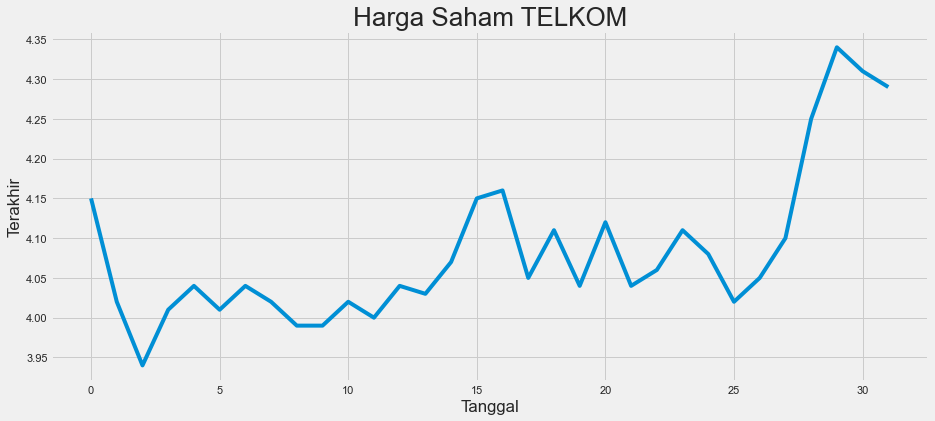

In [10]:
plt.figure(figsize=(14, 6))
plt.title("Harga Saham TELKOM", fontsize=26)
plt.xlabel("Tanggal")
plt.ylabel("Terakhir")
plt.plot(data["Terakhir"])
plt.show()

Dari grafik di atas, terlihat bahwa kenaikan harga saham yang cukup signifikan yaitu 4.35 setelah sebelum nya di angka 4.00

Sekarang, mari kita lihat korelasi dari dataset 

           Terakhir  Pembukaan  Tertinggi  Terendah
Terakhir   1.000000   0.803242   0.947160  0.884990
Pembukaan  0.803242   1.000000   0.906282  0.927781
Tertinggi  0.947160   0.906282   1.000000  0.921046
Terendah   0.884990   0.927781   0.921046  1.000000


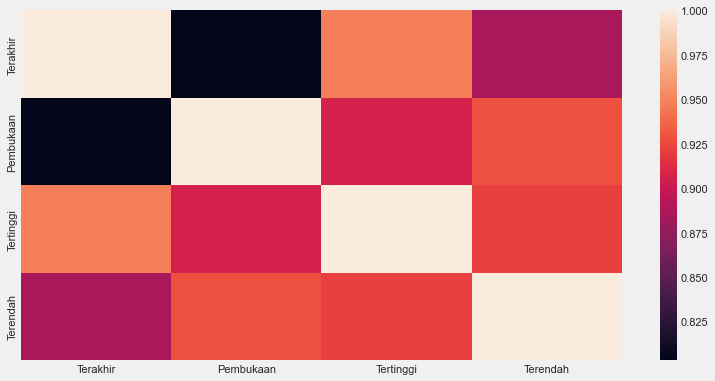

In [13]:
print(data.corr())
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr())
plt.show()

In [14]:
# Feature selection

feature = data[["Pembukaan","Tertinggi","Terendah"]]
target = data["Terakhir"]
feature = feature.to_numpy()
target = target.to_numpy()
target = target.reshape(-1, 1)

In [15]:
#Spliting Data

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(feature, target, test_size=0.2, random_state=42)

Mari kita prediksi harga saham TLKM 5 hari kedepan dengan menggunakan MACHINE LEARNING

In [16]:
#Memilih model

from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(xtrain, ytrain)

DecisionTreeRegressor()

In [17]:
# Model score

ypred = model.predict(xtest)
data = pd.DataFrame(data={"Predicted Rate": ypred})
print(data.head())

   Predicted Rate
0            4.25
1            4.10
2            3.94
3            4.06
4            3.94


# SUMMARY

Hasil prediksi harga saham TELKOM pada 5 hari kedepan menggunakan MACHINE LEARNING.


THANK YOU..
Data source : id.investing.com